## AirBnB Analysis
<i> Summary of the AirBnB data - to be filled in once below complete </i>

Sources used for code below: 
https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e
https://chat.openai.com

## Setup

In [143]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read 2020 and 2023 AirBnB Data Files and store into Pandas DataFrames
AirBnB_2020_data = pd.read_csv("../AirBnB Analysis/resources/AB_US_2020.csv")
AirBnB_2023_data = pd.read_csv("../AirBnB Analysis/resources/AB_US_2023.csv")


In [144]:
#Clean data for AirBnb 2020 - delete unneeded data
del AirBnB_2020_data["host_name"]
del AirBnB_2020_data["neighbourhood_group"]
del AirBnB_2020_data["host_id"]
del AirBnB_2020_data["neighbourhood"]
del AirBnB_2020_data["calculated_host_listings_count"]
del AirBnB_2020_data["last_review"]
AirBnB_2020_data.head()

,year,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,city
0,2020,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,0,Asheville
1,2020,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,288,Asheville
2,2020,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,298,Asheville
3,2020,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,0,Asheville
4,2020,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,0,Asheville


In [145]:
#Clean data for AirBnb 2023 - delete unneeded data
del AirBnB_2023_data["host_name"]
del AirBnB_2023_data["neighbourhood_group"]
del AirBnB_2023_data["host_id"]
del AirBnB_2023_data["neighbourhood"]
del AirBnB_2023_data["calculated_host_listings_count"]
del AirBnB_2023_data["last_review"]
del AirBnB_2023_data["number_of_reviews_ltm"]
AirBnB_2023_data.head()

,year,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,city
0,2023,958.0,"Bright, Modern Garden Unit - 1BR/1BTH",37.77028,-122.43317,Entire home/apt,202,2,383,2.31,128,San Francisco
1,2023,5858.0,Creative Sanctuary,37.74474,-122.42089,Entire home/apt,235,30,111,0.66,365,San Francisco
2,2023,8142.0,Friendly Room Apt. Style -UCSF/USF - San Franc...,37.76555,-122.45213,Private room,56,32,9,0.09,365,San Francisco
3,2023,8339.0,Historic Alamo Square Victorian,37.77564,-122.43642,Entire home/apt,575,9,28,0.17,365,San Francisco
4,2023,8739.0,"Mission Sunshine, with Private Bath",37.76030,-122.42197,Private room,110,1,770,4.65,159,San Francisco


In [146]:
AirBnB_2020_count = AirBnB_2020_data["id"].nunique()
AirBnB_2020_count

226029

In [147]:
AirBnB_2023_count = AirBnB_2023_data["id"].nunique()
AirBnB_2023_count

215468

In [196]:
# Combine the data into a single dataset using left join
# Used ChatGPT & Google Source to help with code below 
AirBnB_data_complete = pd.concat([AirBnB_2020_data, AirBnB_2023_data], ignore_index=False)
AirBnB_data_complete.head()


,year,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,city
0,2020,38585.0,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,0,Asheville
1,2020,80905.0,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,288,Asheville
2,2020,108061.0,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,298,Asheville
3,2020,155305.0,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,0,Asheville
4,2020,160594.0,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,0,Asheville


## Customer Demand Summary - 2020

For the purposes of this analysis, popularity is determined by the % availability and expensive by avg. price per city 
- Analyze most popular Top 10 cities in U.S. = low mean availability (i.e., low mean indicates AirBnB was rented and NOT available) in 2020
- Analyze least popular Bottom 10 cities in U.S. = high % availability (i.e., high mean indicates AirBnB was NOT rented and therefore available) in 2020
- Analyze most expensive Top 10 cities in U.S. = top 10 cities with highest avg. prices of AirBnB per city in 2020
- Analyze least expensive Bottom 10 cities in U.S. =  bottom 10 cities with highest avg. prices of AirBnB per city in 2020


In [241]:
# Calculate the total number of unique AirBnBs grouped by City
Total_AirBnBs_2020 = AirBnB_2020_data.groupby("city").size().sort_values(ascending=False)
Total_AirBnBs_2020

city
New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Seattle               6575
Twin Cities MSA       6470
New Orleans           6408
Chicago               6397
Nashville             6139
Portland              4281
Denver                4200
Rhode Island          3884
Boston                3339
Oakland               3204
San Mateo County      2855
Jersey City           2488
Asheville             2074
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
dtype: int64

In [292]:
# Group the data by city and calculate the average availability per AirBnB
popularity_2020 = AirBnB_2020_data.groupby("city")["availability_365"].mean().round(1)

#Display Most Popular Cities (i.e., Top 10) with lowest mean of availability
popularity_2020.sort_values(ascending=True).head(10)


city
Oakland            115.0
New York City      120.7
Twin Cities MSA    126.3
Seattle            126.4
Denver             128.1
Austin             133.5
Cambridge          134.9
Washington D.C.    140.2
San Diego          143.3
Rhode Island       146.4
Name: availability_365, dtype: float64

In [297]:
#Display Least Popular Cities (i.e., Bottom 10) with highest % availability
popularity_2020.sort_values(ascending=False).head(10)

city
Hawaii            223.9
Broward County    199.0
Clark County      185.5
Nashville         185.2
Boston            184.5
Jersey City       183.8
Pacific Grove     179.7
New Orleans       175.2
Chicago           174.3
Los Angeles       173.8
Name: availability_365, dtype: float64

In [304]:
#Calculate avg. price per AirBnB grouped by City
average_price_per_city_2020=AirBnB_2020_data.groupby(["city"])["price"].mean()

#Display Most Expensive Cities (i.e., Top 10 highest avg. price of AirBnB)
average_price_per_city_2020.sort_values(ascending=False).head(10)

city
Twin Cities MSA      509.906028
Columbus             321.718950
San Diego            318.820864
Hawaii               309.085986
Rhode Island         288.720906
Austin               269.290054
Santa Cruz County    257.101209
San Francisco        252.018857
Pacific Grove        251.111732
Salem                247.727723
Name: price, dtype: float64

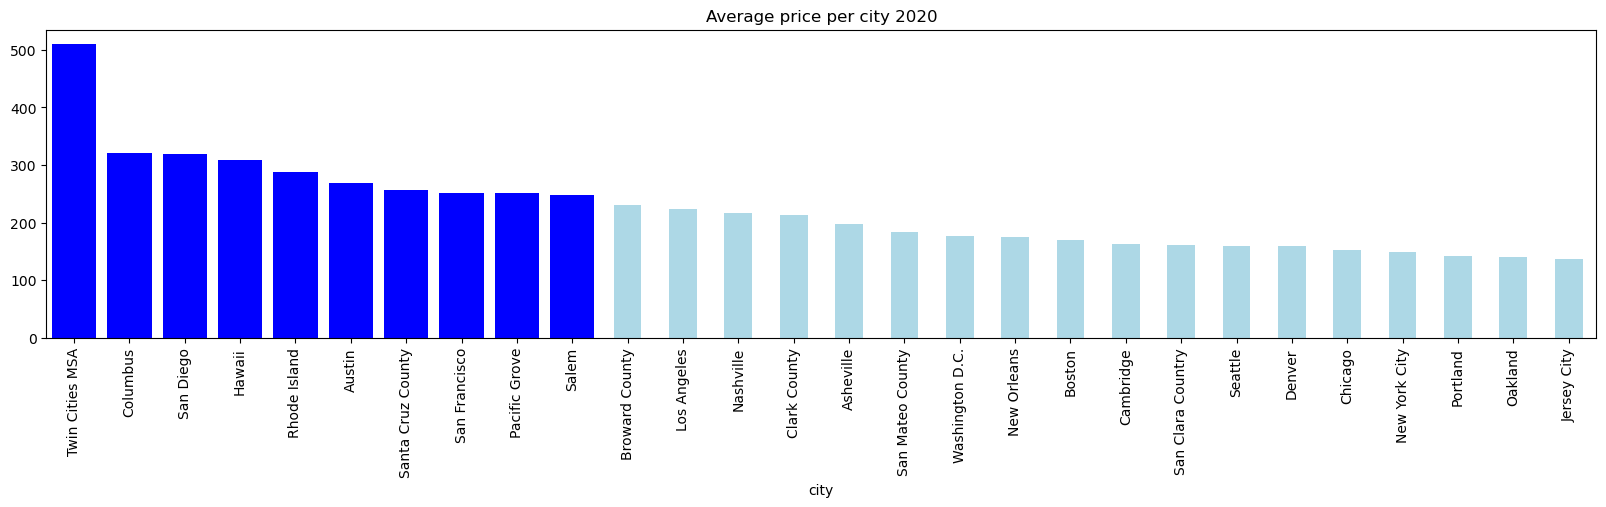

In [333]:
# Sort the data in ascending order
average_price_per_city_2020_sorted = average_price_per_city_2020.sort_values(ascending=False)

# Plot bar graph showing the average price of AirBnBs by city
plt.figure(figsize=(20, 4))
ax = average_price_per_city_2020_sorted.plot(kind="bar", color="lightblue") 

# Color the top 10 bars differently
top_10_cities = average_price_per_city_2020_sorted.nlargest(10)
for city in top_10_cities.index:
    ax.bar(city, top_10_cities[city], color="blue")  # Color the top 10 bars with blue color


plt.title("Average price per city 2020")
plt.show()

In [336]:
#Display Least Expensive Cities (i.e., Bottom 10 lowest avg. price of AirBnB)
average_price_per_city_2020.sort_values(ascending=True).head(10)

city
Jersey City          137.039791
Oakland              139.956617
Portland             141.029666
New York City        149.557413
Chicago              153.020009
Denver               158.860714
Seattle              159.720152
San Clara Country    161.721760
Cambridge            163.072886
Boston               170.331836
Name: price, dtype: float64

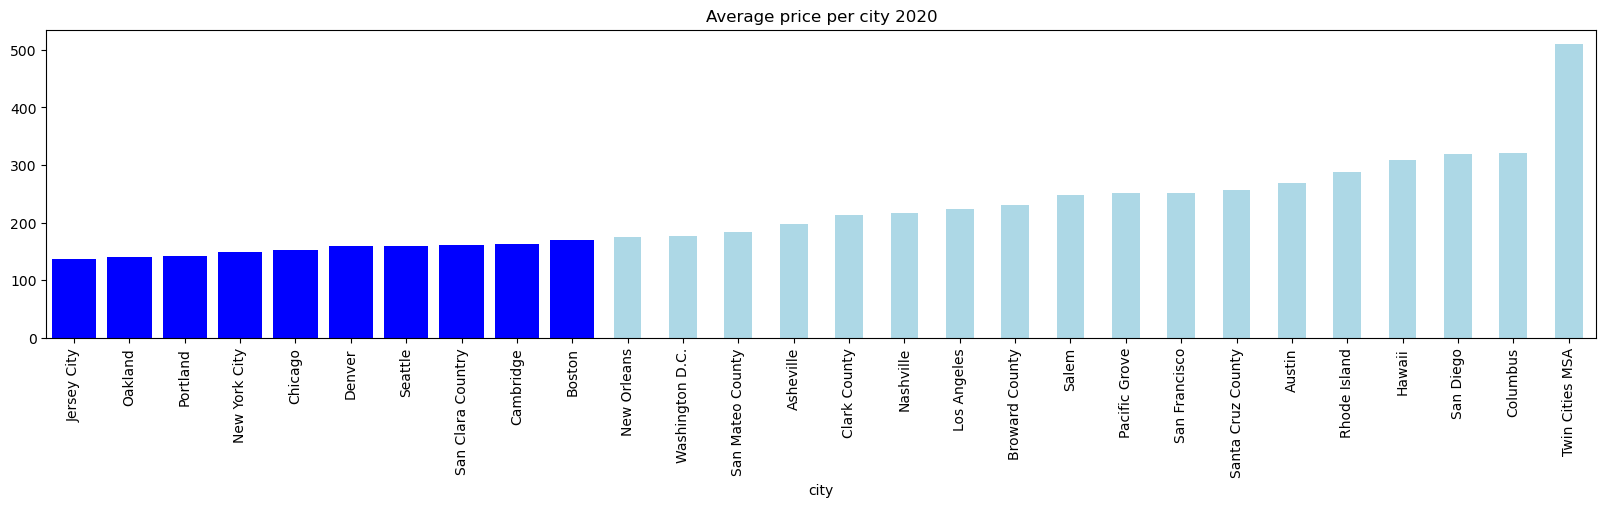

In [363]:
# Sort the data in ascending order
average_price_per_city_2020_sorted = average_price_per_city_2020.sort_values(ascending=True)

# Plot bar graph showing the average price of AirBnBs by city
plt.figure(figsize=(20, 4))
ax = average_price_per_city_2020_sorted.plot(kind="bar", color="lightblue")

# Plot bottom 10 bars separately to change their color
bottom_10_cities = average_price_per_city_2020_sorted.nsmallest(10)
for city in bottom_10_cities.index:
    plt.bar(city, bottom_10_cities[city], color="blue")

plt.title("Average price per city 2020")
plt.show()


## Customer Demand Summary - 2023

For the purposes of this analysis, popularity is determined by the % availability and expensive by avg. price per city 
- Analyze most popular Top 10 cities in U.S. = low mean availability (i.e., low mean indicates AirBnB was rented and NOT available) in 2023
- Analyze least popular Bottom 10 cities in U.S. = high % availability (i.e., high mean indicates AirBnB was NOT rented and therefore available) in 2023
- Analyze most expensive Top 10 cities in U.S. = top 10 cities with highest avg. prices of AirBnB per city in 2023
- Analyze least expensive Bottom 10 cities in U.S. =  bottom 10 cities with highest avg. prices of AirBnB per city in 2023


In [365]:
# Calculate the total number of unique AirBnBs grouped by City
Total_AirBnBs_2023 = AirBnB_2020_data.groupby("city").size().sort_values(ascending=False)
Total_AirBnBs_2023

city
New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Seattle               6575
Twin Cities MSA       6470
New Orleans           6408
Chicago               6397
Nashville             6139
Portland              4281
Denver                4200
Rhode Island          3884
Boston                3339
Oakland               3204
San Mateo County      2855
Jersey City           2488
Asheville             2074
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
dtype: int64

In [386]:
#Calculate popularity of cities in U.S. by calculating availability per AirBnB grouped by City
popularity_2023 = AirBnB_2023_data.groupby("city")["availability_365"].mean().round(1)

#Display Most Popular Cities (i.e., Top 10) with lowest % availability
popularity_2023.sort_values(ascending=True).head(10)


city
New York City        140.3
Austin               152.2
Rhode Island         160.8
Cambridge            167.9
San Francisco        169.8
Washington D.C.      171.6
Denver               173.0
Oakland              174.2
New Orleans          176.2
Santa Cruz County    178.6
Name: availability_365, dtype: float64

In [406]:
#Display Least Popular Cities (i.e., Bottom 10) with highest % availability
popularity_2023.sort_values(ascending=False).head(10)

city
Broward County    220.4
Columbus          208.0
Nashville         206.7
Asheville         204.5
Chicago           201.5
Los Angeles       200.0
Boston            199.5
Jersey City       197.7
Salem             195.5
Clark County      193.9
Name: availability_365, dtype: float64

In [425]:
#Calculate avg. price per AirBnB grouped by City
average_price_per_city_2023=AirBnB_2023_data.groupby(["city"])["price"].mean()

#Display Most Expensive Cities (i.e., Top 10 highest avg. price of AirBnB)
average_price_per_city_2023.sort_values(ascending=False).head(10)

city
Clark County         441.342927
Rhode Island         344.239561
San Francisco        330.092561
Santa Cruz County    311.923734
Broward County       311.754305
Austin               310.029928
San Diego            309.593505
Pacific Grove        289.322727
Los Angeles          283.333962
Nashville            281.604001
Name: price, dtype: float64

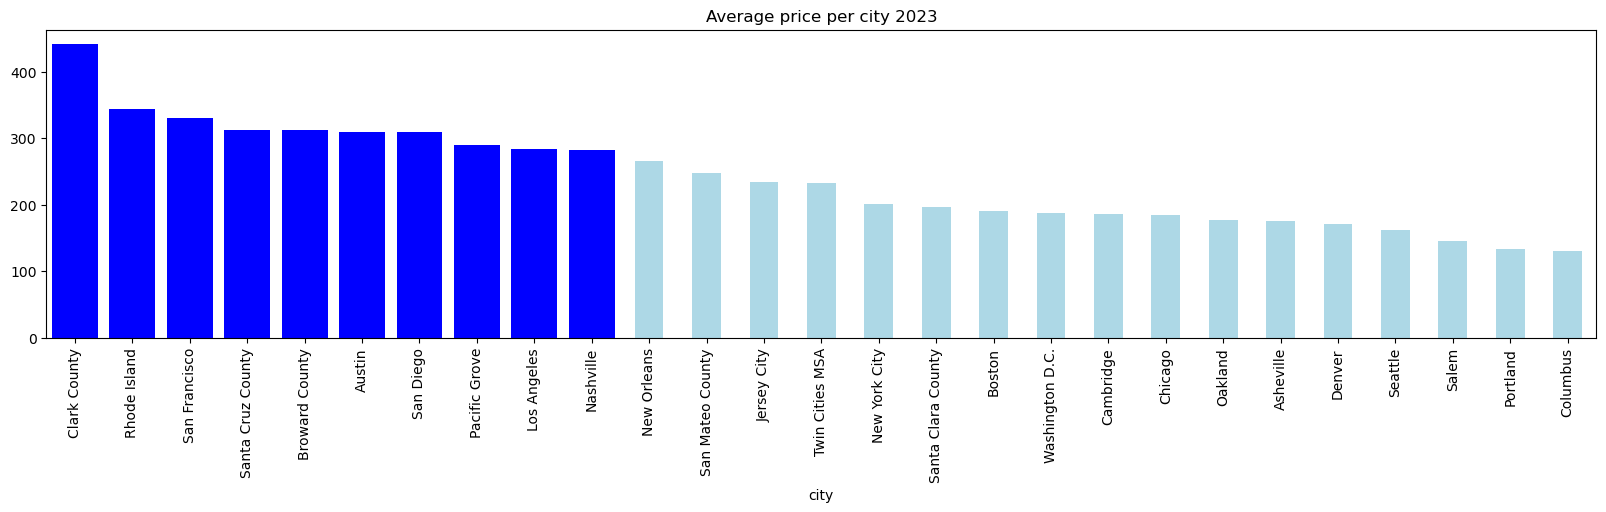

In [443]:
# Sort the data in ascending order
average_price_per_city_2023_sorted = average_price_per_city_2023.sort_values(ascending=False)

# Plot bar graph showing the average price of AirBnBs by city
plt.figure(figsize=(20, 4))
ax = average_price_per_city_2023_sorted.plot(kind="bar", color="lightblue") 

# Color the top 10 bars differently
top_10_cities = average_price_per_city_2023_sorted.nlargest(10)
for city in top_10_cities.index:
    ax.bar(city, top_10_cities[city], color="blue")  # Color the top 10 bars with blue color


plt.title("Average price per city 2023")
plt.show()

In [461]:
#Display Least Expensive Cities (i.e., Bottom 10 lowest avg. price of AirBnB)
average_price_per_city_2020.sort_values(ascending=True).head(10)

city
Jersey City          137.039791
Oakland              139.956617
Portland             141.029666
New York City        149.557413
Chicago              153.020009
Denver               158.860714
Seattle              159.720152
San Clara Country    161.721760
Cambridge            163.072886
Boston               170.331836
Name: price, dtype: float64

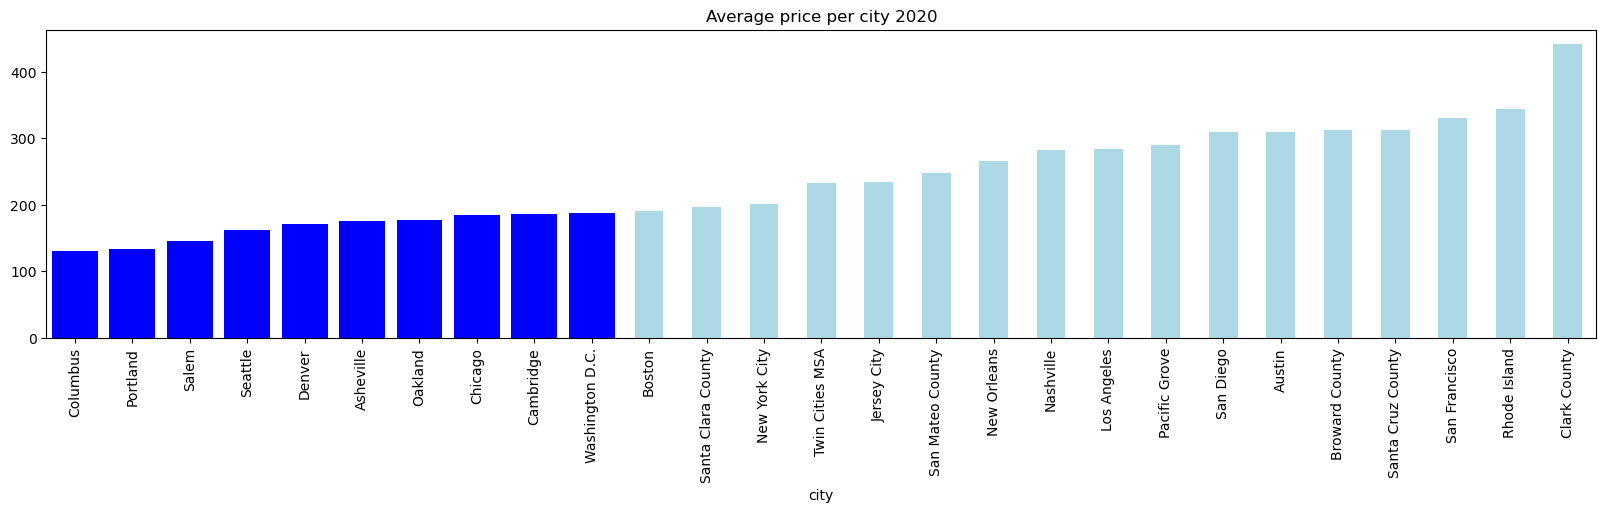

In [478]:
# Sort the data in ascending order
average_price_per_city_2023_sorted = average_price_per_city_2023.sort_values(ascending=True)

# Plot bar graph showing the average price of AirBnBs by city
plt.figure(figsize=(20, 4))
ax = average_price_per_city_2023_sorted.plot(kind="bar", color="lightblue")

# Plot bottom 10 bars separately to change their color
bottom_10_cities = average_price_per_city_2023_sorted.nsmallest(10)
for city in bottom_10_cities.index:
    plt.bar(city, bottom_10_cities[city], color="blue")

plt.title("Average price per city 2020")
plt.show()

## Understanding Customer Behavior - 2020

Customer Behavior correlations based on available data: 
- Analyze % of renters who preferred Entire Home vs. Private Room in 2020
- Analyze number of reviews compared to % availability of the AirBnB in 2020
- Analyze comparison of price vs. minimum number of nights booked in 2020
- Analyze number of reviews compared to city (i.e., which cities see most reviews which see least) in 2020
- Analyze how weather impacts AirBnB availability by city in 2020

In [479]:
# Calculate % of renters who preferred Entire Home vs. Private Room in 2020

In [480]:
# Calculate number of reviews compared to % availability of the AirBnB in 2020

In [481]:
# Create comparison of price vs. minimum number of nights booked in 2020

In [482]:
# Calculate number of reviews compared to city (i.e., which cities see most reviews which see least) in 2020

In [483]:
# Use weather API key to compare within city

## Understanding Customer Behavior - 2023

Customer Behavior correlations based on available data: 
- Analyze % of renters who preferred Entire Home vs. Private Room in 2023
- Analyze number of reviews compared to % availability of the AirBnB in 2023
- Analyze comparison of price vs. minimum number of nights booked in 2023
- Analyze number of reviews compared to city (i.e., which cities see most reviews which see least) in 2023
- Analyze how weather impacts AirBnB availability by city in 2023

In [484]:
# Calculate % of renters who preferred Entire Home vs. Private Room in 2023

In [485]:
# Calculate number of reviews compared to % availability of the AirBnB in 2023

In [486]:
# Create comparison of price vs. minimum number of nights booked in 2023

In [487]:
# Calculate number of reviews compared to city (i.e., which cities see most reviews which see least) in 2020

In [488]:
# Use weather API key to compare within city

## Comparing AirBnB rentals in 2020 and 2023

- Compare 2020 to 2023 number of rentals
- Compare 2020 to 2023 price of rentals
- Compare 2020 to 2023 reviews of rentals
- Compare 2020 to 2023 % of availability 
- Compare 2020 to 2023 avg. minimum number of nights booked

In [572]:
# Compare 2020 to 2023 total number of rentals
# Sum the number of rentals for 2020
total_rentals_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020]['id'].count()

# Sum the number of rentals for 2023
total_rentals_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023]['id'].count()

# Display the total number of rentals for each year
print("Total number of rentals in 2020:", total_rentals_2020)
print("Total number of rentals in 2023:", total_rentals_2023)

# Calculate the percent change in total number of rentals between 2020 and 2023
percent_change_total_rentals = ((total_rentals_2023 - total_rentals_2020) / total_rentals_2023) * 100

# Display the percent change formatted as a percentage
print("Percent change in total number of rentals between 2020 and 2023: {:.2f}%".format(percent_change_total_rentals))

Total number of rentals in 2020: 226030
Total number of rentals in 2023: 232147
Percent change in total number of rentals between 2020 and 2023: 2.63%


In [578]:
# Compare 2020 to 2023 avg. price of rentals
# Average price of rentals for 2020
avg_price_rentals_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020]['price'].mean().round(1)

# Average price of rentals for 2023
avg_price_rentals_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023]['price'].mean().round(1)

# Display average price of rentals for each year
print("Average price of rentals in 2020:", avg_price_rentals_2020)
print("Average price of rentals in 2023:", avg_price_rentals_2023)

# Calculate the percent change in average price of rentals between 2020 and 2023
percent_change_avg_price = ((avg_price_rentals_2023 - avg_price_rentals_2020) / avg_price_rentals_2023) * 100

# Display the percent change formatted as a percentage
print("Percent change in average price of rentals between 2020 and 2023: {:.2f}%".format(percent_change_avg_price))

Average price of rentals in 2020: 219.7
Average price of rentals in 2023: 259.5
Percent change in average price of rentals between 2020 and 2023: 15.34%


In [583]:
# Compare 2020 to 2023 avg. number of reviews of rentals
# Average number of reviews of rentals for 2020
avg_reviews_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020]['number_of_reviews'].mean().round(1)

# Average number of reviews of rentals for 2023
avg_reviews_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023]['number_of_reviews'].mean().round(1)

# Display average number of reviews of rentals for each year
print("Average number of reviews of rentals in 2020:", avg_reviews_2020)
print("Average number of reviews of rentals in 2023:", avg_reviews_2023)

# Calculate the percent change in average number of reviews of rentals between 2020 and 2023
percent_change_avg_reviews = ((avg_reviews_2023 - avg_reviews_2020) / avg_reviews_2023) * 100

# Display the percent change formatted as a percentage
print("Percent change in average number of reviews of rentals between 2020 and 2023: {:.2f}%".format(percent_change_avg_reviews))

Average number of reviews of rentals in 2020: 34.5
Average number of reviews of rentals in 2023: 40.9
Percent change in average number of reviews of rentals between 2020 and 2023: 15.65%


In [587]:
# Compare 2020 to 2023 mean of availability for rentals
# Average nights of availability for AirBnB rentals in 2020
avg_availability_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020]['availability_365'].mean().round(1)

# Average nights of availability for AirBnB rentals in 2023
avg_availability_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023]['availability_365'].mean().round(1)

# Display the average nights of availability for AirBnB rentals for each year
print("Average nights of availability for AirBnB rentals in 2020:", avg_availability_2020)
print("Average nights of availability for AirBnB rentals in 2023:", avg_availability_2023)

# Calculate the difference in the average nights of availability for AirBnB rentals between 2020 and 2023
percent_change_avg_availability = ((avg_availability_2023 - avg_availability_2020) / avg_availability_2023) * 100

# Display the percent change formatted as a percentage
print("Percent change in the average nights of availability between 2020 and 2023: {:.2f}%".format(percent_change_avg_availability))

Average nights of availability for AirBnB rentals in 2020: 159.3
Average nights of availability for AirBnB rentals in 2023: 181.0
Percent change in the average nights of availability between 2020 and 2023: 11.99%


In [596]:
# Compare 2020 to 2023 avg. minimum number of nights booked
# Average minimum number of nights booked for AirBnB rentals in 2020
avg_minimum_night_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020]['minimum_nights'].median()

# Average minimum number of nights booked for AirBnB rentals in 2023
avg_minimum_night_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023]['minimum_nights'].median()

# Display the average minimum number of nights booked for each year
print("Average minimum number of nights booked for AirBnB rentals in 2020:", avg_minimum_night_2020)
print("Average minimum number of nights booked for AirBnB rentals in 2023:", avg_minimum_night_2023)

# Calculate the difference in the average minimum number of nights booked between 2020 and 2023
percent_change_min_nights = ((avg_minimum_night_2023 - avg_minimum_night_2020) / avg_minimum_night_2023) * 100

# Display the percent change formatted as a percentage
print("Percent change in the average nights of availability between 2020 and 2023: {:.2f}%".format(percent_change_min_nights))

Average minimum number of nights booked for AirBnB rentals in 2020: 2.0
Average minimum number of nights booked for AirBnB rentals in 2023: 3.0
Percent change in the average nights of availability between 2020 and 2023: 33.33%


In [601]:
# Create summary table comparing 2020 to 2023 AirBnB data
# Define data set for the DataFrame
AirBnB_data_input = {
    'Metric': ['Total number of rentals', 'Average price of rentals', 'Average number of reviews of rentals',
               'Average nights of availability', 'Average minimum number of nights booked'],
    '2020': [total_rentals_2020, avg_price_rentals_2020, avg_reviews_2020, avg_availability_2020, avg_minimum_night_2020],
    '2023': [total_rentals_2023, avg_price_rentals_2023, avg_reviews_2023, avg_availability_2023, avg_minimum_night_2023],
    'Percent Change': [percent_change_total_rentals, percent_change_avg_price, percent_change_avg_reviews,
                       percent_change_avg_availability, percent_change_min_nights]
}

# Create DataFrame
summary_table = pd.DataFrame(AirBnB_data_input)

# Format percent change & total number of rentals columns
summary_table['Percent Change'] = summary_table['Percent Change'].map('{:.2f}%'.format)
summary_table.loc[summary_table['Metric'] == 'Total number of rentals', ['2020', '2023']] = summary_table.loc[summary_table['Metric'] == 'Total number of rentals', ['2020', '2023']].applymap('{:,.1f}'.format)

# Set Metric column as index
summary_table.set_index('Metric', inplace=True)

# Display the summary table
print(summary_table)

                                              2020       2023 Percent Change
Metric                                                                      
Total number of rentals                  226,030.0  232,147.0          2.63%
Average price of rentals                     219.7      259.5         15.34%
Average number of reviews of rentals          34.5       40.9         15.65%
Average nights of availability               159.3      181.0         11.99%
Average minimum number of nights booked        2.0        3.0         33.33%


## Comparing AirBnB rentals in 2020 and 2023 by Cities

- Compare 2020 to 2023 number of rentals, i.e., which cities saw an increase / decrease in AirBnB rental options
- Compare 2020 to 2023 price of rentals, i.e., which cities saw an increase / decrease in average prices
- Compare 2020 to 2023 mean of availability, i.e., which cities saw an increase / decrease in availability (correlated to popularity of location)

In [650]:
# Compare 2020 to 2023 avg. number of rentals by city
# Sum the number of rentals by city for 2020
total_rentals_city_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020].groupby("city")['id'].count()

# Sum the number of rentals by city for 2023
total_rentals_city_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023].groupby("city")['id'].count()

# Calculate percent change of number of rentals between 2020 to 2023
percent_change_total_rentals_city = (((total_rentals_city_2023 - total_rentals_city_2020) / total_rentals_city_2020) * 100).map('{:.2f}%'.format)

# Create a DataFrame with cities as rows and years as columns
rentals_comparison_df = pd.DataFrame({'Total Rentals 2020': total_rentals_city_2020, 'Total Rentals 2023': total_rentals_city_2023, 'Percent Change': percent_change_total_rentals_city})

# Sort the DataFrame by the 'Percent Change' column in descending order
rentals_comparison_sorted = rentals_comparison_df.sort_values(by='Percent Change', ascending=False)

# Convert 'Percent Change' column to numeric values
rentals_comparison_sorted['Percent Change'] = rentals_comparison_sorted['Percent Change'].str.rstrip('%').astype(float)

# Filter out rows with "nan%" in the 'Percent Change' column
rentals_comparison_sorted_filtered = rentals_comparison_sorted[rentals_comparison_sorted['Percent Change'].notnull()]

# Sort the DataFrame by the 'Percent Change' column in descending order
rentals_comparison_sorted_filtered = rentals_comparison_sorted_filtered.sort_values(by='Percent Change', ascending=False)
rentals_comparison_sorted_filtered['Percent Change'] = rentals_comparison_sorted_filtered['Percent Change'].map('{:.2f}%'.format)

# Display the top 10 cities that saw increase in # of rentals available from 2020 to 2023
print(rentals_comparison_sorted_filtered.head(10))


                Total Rentals 2020  Total Rentals 2023 Percent Change
city                                                                 
Columbus                    1409.0              2344.0         66.36%
Clark County                8408.0             13933.0         65.71%
Broward County             10858.0             16899.0         55.64%
Asheville                   2074.0              3161.0         52.41%
Salem                        202.0               288.0         42.57%
Nashville                   6139.0              8548.0         39.24%
Austin                     10436.0             14368.0         37.68%
Los Angeles                31536.0             42451.0         34.61%
Denver                      4200.0              5362.0         27.67%
Pacific Grove                179.0               220.0         22.91%


In [651]:
# Compare 2020 to 2023 avg. number of rentals by city
# Sum the number of rentals by city for 2020
total_rentals_city_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020].groupby("city")['id'].count()

# Sum the number of rentals by city for 2023
total_rentals_city_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023].groupby("city")['id'].count()

# Calculate percent change of number of rentals between 2020 to 2023
percent_change_total_rentals_city = (((total_rentals_city_2023 - total_rentals_city_2020) / total_rentals_city_2020) * 100).map('{:.2f}%'.format)

# Create a DataFrame with cities as rows and years as columns
rentals_comparison_df = pd.DataFrame({'Total Rentals 2020': total_rentals_city_2020, 'Total Rentals 2023': total_rentals_city_2023, 'Percent Change': percent_change_total_rentals_city})

# Sort the DataFrame by the 'Percent Change' column in ascending order
rentals_comparison_sorted = rentals_comparison_df.sort_values(by='Percent Change', ascending=True)

# Convert 'Percent Change' column to numeric values
rentals_comparison_sorted['Percent Change'] = rentals_comparison_sorted['Percent Change'].str.rstrip('%').astype(float)

# Filter out rows with "nan%" in the 'Percent Change' column
rentals_comparison_sorted_filtered = rentals_comparison_sorted[rentals_comparison_sorted['Percent Change'].notnull()]

# Display filtered/sorted dataframe in correct format
rentals_comparison_sorted_filtered = rentals_comparison_sorted_filtered.sort_values(by='Percent Change', ascending=True)
rentals_comparison_sorted_filtered['Percent Change'] = rentals_comparison_sorted_filtered['Percent Change'].map('{:.2f}%'.format)

# Display the bottom 10 cities that saw decrease in # of rentals available from 2020 to 2023
print(rentals_comparison_sorted_filtered.head(10))


                   Total Rentals 2020  Total Rentals 2023 Percent Change
city                                                                    
Jersey City                    2488.0              1314.0        -47.19%
Twin Cities MSA                6470.0              4765.0        -26.35%
Oakland                        3204.0              2499.0        -22.00%
Washington D.C.                7350.0              6455.0        -12.18%
New York City                 45756.0             42931.0         -6.17%
Seattle                        6575.0              6376.0         -3.03%
San Francisco                  7053.0              6936.0         -1.66%
Cambridge                      1029.0              1026.0         -0.29%
San Diego                     12404.0             12871.0          3.76%
Santa Cruz County              1571.0              1639.0          4.33%


In [652]:
# Compare 2020 to 2023 price of rentals, i.e., which cities saw an increase in prices
# Average price by city for 2020
avg_price_city_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020].groupby("city")['price'].mean().round(1)

# Average price by city for 2023
avg_price_city_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023].groupby("city")['price'].mean().round(1)

# Calculate percent change AirBnB prices between 2020 to 2023
percent_change_avg_price_city = (((avg_price_city_2023 - avg_price_city_2020) / avg_price_city_2020) * 100).map('{:.2f}%'.format)

# Create a DataFrame with cities as rows and years as columns
price_comparison_df = pd.DataFrame({'Avg. Price 2020': avg_price_city_2020, 'Total Rentals 2023': avg_price_city_2023, 'Percent Change': percent_change_avg_price_city})

# Sort the DataFrame by the 'Percent Change' column in ascending order
price_comparison_sorted = price_comparison_df.sort_values(by='Percent Change', ascending=False)

# Convert 'Percent Change' column to numeric values
price_comparison_sorted['Percent Change'] = price_comparison_sorted['Percent Change'].str.rstrip('%').astype(float)

# Filter out rows with "nan%" in the 'Percent Change' column
price_comparison_sorted_filtered = price_comparison_sorted[price_comparison_sorted['Percent Change'].notnull()]

# Display filtered/sorted dataframe in correct format
price_comparison_sorted_filtered = price_comparison_sorted_filtered.sort_values(by='Percent Change', ascending=False)
price_comparison_sorted_filtered['Percent Change'] = price_comparison_sorted_filtered['Percent Change'].map('{:.2f}%'.format)

# Display the top 10 cities that saw increase in avg. price for rentals between 2020 to 2023
print(price_comparison_sorted_filtered.head(10))


                  Avg. Price 2020  Total Rentals 2023 Percent Change
city                                                                
Clark County                213.8               441.3        106.41%
Jersey City                 137.0               234.7         71.31%
New Orleans                 175.0               265.3         51.60%
Broward County              230.1               311.8         35.51%
San Mateo County            183.9               247.2         34.42%
New York City               149.6               200.3         33.89%
San Francisco               252.0               330.1         30.99%
Nashville                   215.9               281.6         30.43%
Los Angeles                 222.7               283.3         27.21%
Oakland                     140.0               177.3         26.64%


In [654]:
# Compare 2020 to 2023 price of rentals, i.e., which cities saw an increase in prices
# Average price by city for 2020
avg_price_city_2020 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2020].groupby("city")['price'].mean().round(1)

# Average price by city for 2023
avg_price_city_2023 = AirBnB_data_complete[AirBnB_data_complete['year'] == 2023].groupby("city")['price'].mean().round(1)

# Calculate percent change AirBnB prices between 2020 to 2023
percent_change_avg_price_city = (((avg_price_city_2023 - avg_price_city_2020) / avg_price_city_2020) * 100).map('{:.2f}%'.format)

# Create a DataFrame with cities as rows and years as columns
price_comparison_df = pd.DataFrame({'Avg. Price 2020': avg_price_city_2020, 'Total Rentals 2023': avg_price_city_2023, 'Percent Change': percent_change_avg_price_city})

# Sort the DataFrame by the 'Percent Change' column in ascending order
price_comparison_sorted = price_comparison_df.sort_values(by='Percent Change', ascending=True)

# Convert 'Percent Change' column to numeric values
price_comparison_sorted['Percent Change'] = price_comparison_sorted['Percent Change'].str.rstrip('%').astype(float)

# Filter out rows with "nan%" in the 'Percent Change' column
price_comparison_sorted_filtered = price_comparison_sorted[price_comparison_sorted['Percent Change'].notnull()]

# Display filtered/sorted dataframe in correct format
price_comparison_sorted_filtered = price_comparison_sorted_filtered.sort_values(by='Percent Change', ascending=True)
price_comparison_sorted_filtered['Percent Change'] = price_comparison_sorted_filtered['Percent Change'].map('{:.2f}%'.format)

# Display the top 10 cities that saw increase in avg. price for rentals between 2020 to 2023
print(price_comparison_sorted_filtered.head(10))


                 Avg. Price 2020  Total Rentals 2023 Percent Change
city                                                               
Columbus                   321.7               130.4        -59.47%
Twin Cities MSA            509.9               233.2        -54.27%
Salem                      247.7               145.9        -41.10%
Asheville                  196.6               175.0        -10.99%
Portland                   141.0               133.9         -5.04%
San Diego                  318.8               309.6         -2.89%
Seattle                    159.7               161.8          1.31%
Washington D.C.            176.8               187.9          6.28%
Denver                     158.9               171.3          7.80%
Boston                     170.3               190.6         11.92%
